<a href="https://colab.research.google.com/github/ShamsuriIkhwan/plant-deep-learning/blob/main/VGG16_implementation_plant_health_monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import **libraries**

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
from shutil import copyfile
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.model_selection import train_test_split


In [3]:
# Set the path to the original dataset folder
dir = '/content/drive/MyDrive/FYP dataset - 224'

# Set the path to the augmented dataset folder
aug_dir = '/content/aug_FYP dataset_224'


# Print the class names and the number of samples before augmentation
#227
print("For 227 dataset\n")
for class_name in os.listdir(dir):
    class_path = os.path.join(dir, class_name)
    if os.path.isdir(class_path):
        num_samples = len(os.listdir(class_path))
        print(f"Class: {class_name}, Samples: {num_samples}")

num_dir_classes=len(os.listdir(dir))
print("\n","There are", num_dir_classes, "classes in the folder\n")


For 227 dataset

Class: Banana___diseased, Samples: 100
Class: Banana___healthy, Samples: 100
Class: Guava___diseased, Samples: 100
Class: Durian___diseased, Samples: 100
Class: Durian___healthy, Samples: 100
Class: Guava___healthy, Samples: 100
Class: Corn___diseased, Samples: 100
Class: Corn___healthy, Samples: 100
Class: Mango___healthy, Samples: 100
Class: Mango___diseased, Samples: 100

 There are 10 classes in the folder



# **Visualisation**

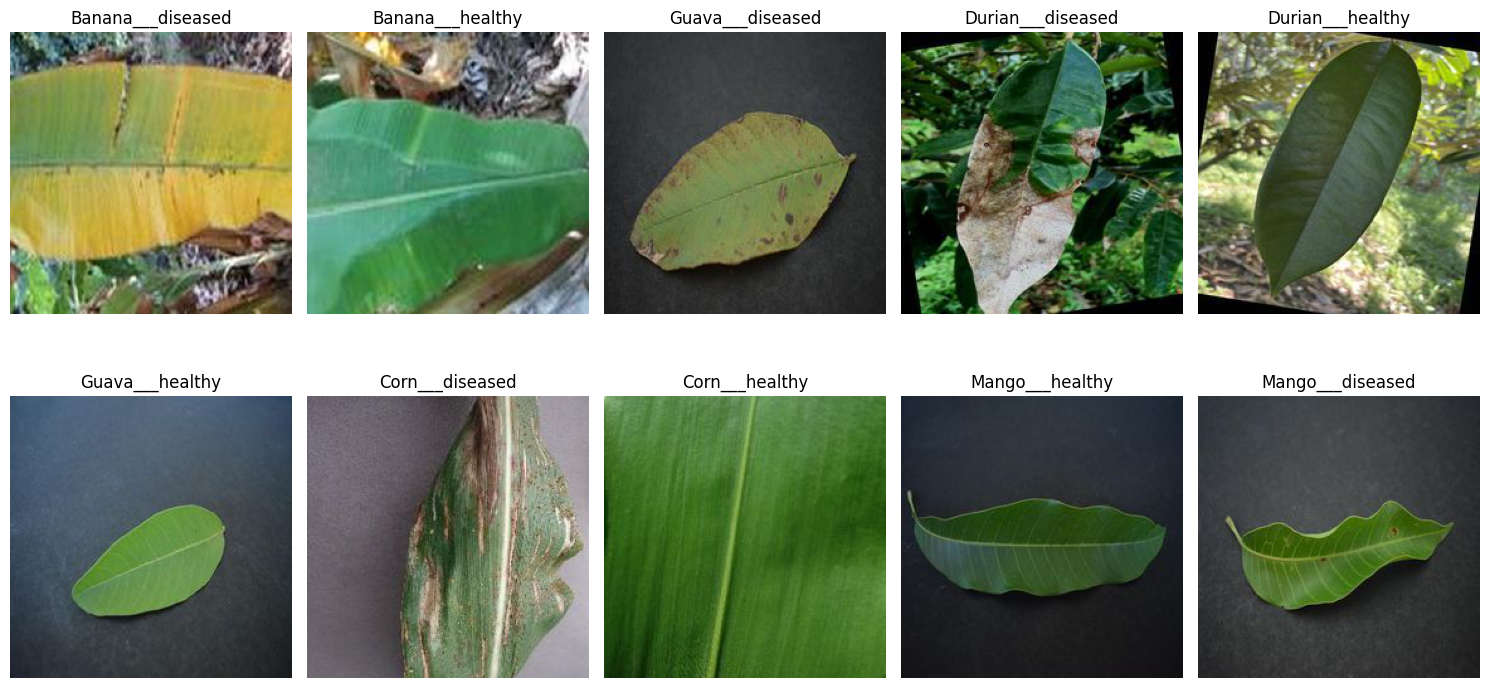

In [4]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 8))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over the class names
for i, class_name in enumerate(os.listdir(dir)):
    class_path = os.path.join(dir, class_name)
    if os.path.isdir(class_path):
        image_files = os.listdir(class_path)

        # Randomly select an image from the class
        selected_image_file = random.choice(image_files)
        image_path = os.path.join(class_path, selected_image_file)
        image = plt.imread(image_path)

        # Plot the image in the corresponding subplot
        axes[i].imshow(image)
        axes[i].set_title(class_name)
        axes[i].axis('off')

plt.tight_layout()
plt.show()


# **Augmentation**

In [5]:
print("For 224 dataset augmentation\n")

# Perform data augmentation for each class
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='reflect')

# Iterate over the classes in the original dataset
for class_name in os.listdir(dir):
    class_path = os.path.join(dir, class_name)
    if os.path.isdir(class_path):
        class_images = os.listdir(class_path)
        num_samples = len(class_images)

        # Create a directory for the current class in the augmented dataset folder
        aug_class_dir = os.path.join(aug_dir, class_name)
        os.makedirs(aug_class_dir, exist_ok=True)

        # Copy original images to the augmented dataset folder
        for image_name in class_images:
            original_image_path = os.path.join(class_path, image_name)
            target_image_path = os.path.join(aug_class_dir, image_name)
            copyfile(original_image_path, target_image_path)

            # Apply data augmentation and save augmented images
            img = tf.keras.preprocessing.image.load_img(original_image_path)
            x = tf.keras.preprocessing.image.img_to_array(img)
            x = x.reshape((1,) + x.shape)
            i = 0
            for batch in datagen.flow(x, batch_size=16,
                                      save_to_dir=aug_class_dir,
                                      save_prefix='aug',
                                      save_format='jpg'):
                i += 1
                if i > 20:
                    break


For 224 dataset augmentation



# **Data refining**

In [6]:
# Print the class names and the number of samples after augmentation
for class_name in os.listdir(aug_dir):
    class_path = os.path.join(aug_dir, class_name)
    if os.path.isdir(class_path):
        num_samples = len(os.listdir(class_path))
        print(f"Class: {class_name}, Samples: {num_samples}")

num_classes = len(os.listdir(aug_dir))
print("There are", num_classes, "classes in the folder")

Class: Corn___diseased, Samples: 1977
Class: Banana___healthy, Samples: 1993
Class: Mango___healthy, Samples: 1997
Class: Guava___healthy, Samples: 2015
Class: Corn___healthy, Samples: 1990
Class: Banana___diseased, Samples: 1988
Class: Durian___healthy, Samples: 1996
Class: Mango___diseased, Samples: 1972
Class: Durian___diseased, Samples: 2003
Class: Guava___diseased, Samples: 1984
There are 10 classes in the folder


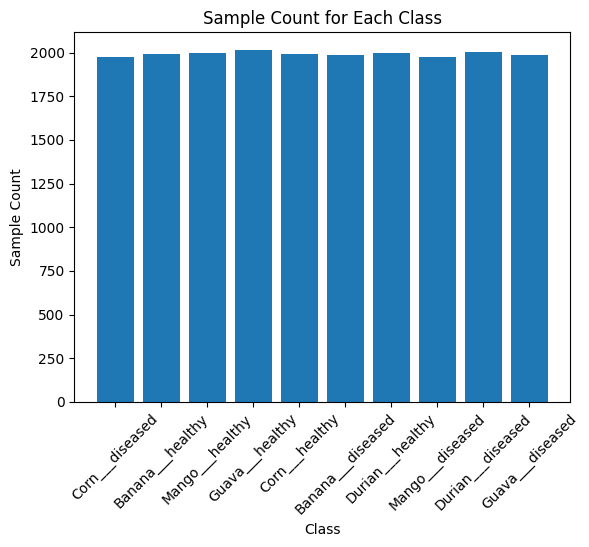

In [7]:
class_counts = []
class_labels = []

for class_name in os.listdir(aug_dir):
    class_path = os.path.join(aug_dir, class_name)
    file_count = len(os.listdir(class_path))
    class_counts.append(file_count)
    class_labels.append(class_name)

plt.bar(class_labels, class_counts)
plt.title('Sample Count for Each Class')
plt.xlabel('Class')
plt.ylabel('Sample Count')
plt.xticks(rotation=45)
plt.show()

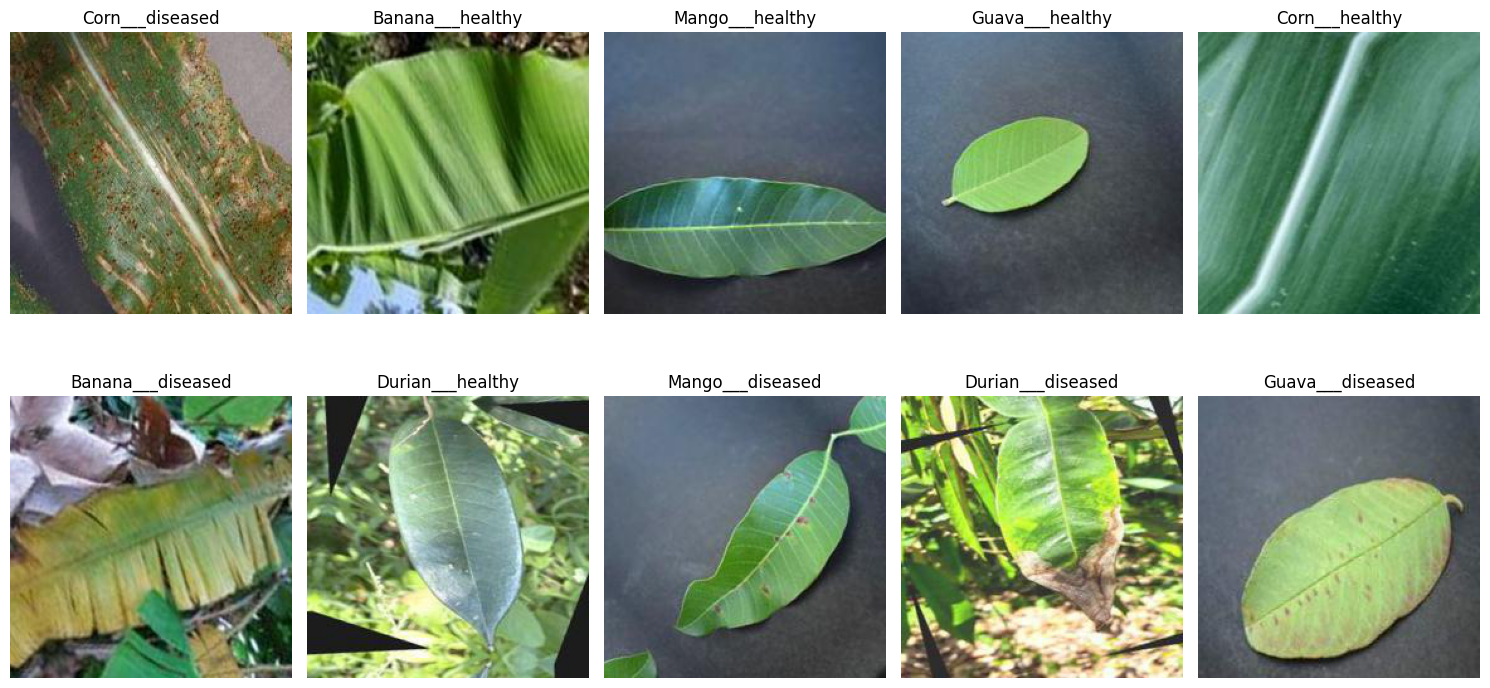

In [8]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 8))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over the class names
for i, class_name in enumerate(os.listdir(aug_dir)):
    class_path = os.path.join(aug_dir, class_name)
    if os.path.isdir(class_path):
        image_files = os.listdir(class_path)

        # Randomly select an image from the class
        selected_image_file = random.choice(image_files)
        image_path = os.path.join(class_path, selected_image_file)
        image = plt.imread(image_path)

        # Plot the image in the corresponding subplot
        axes[i].imshow(image)
        axes[i].set_title(class_name)
        axes[i].axis('off')

plt.tight_layout()
plt.show()

# **Splitting dataset**

In [9]:
# Set the path to the folder for the split dataset
split_dir = '/content/split_dataset_224'
os.makedirs(split_dir, exist_ok=True)

# Set the desired split ratios (e.g., 70% train, 15% validation, 15% test)
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Iterate over the class names
for class_name in os.listdir(aug_dir):
    class_path = os.path.join(aug_dir, class_name)
    if os.path.isdir(class_path):
        image_files = os.listdir(class_path)

        # Split the image files into train, validation, and test sets
        train_files, val_test_files = train_test_split(image_files, test_size=val_ratio + test_ratio, random_state=42)
        val_files, test_files = train_test_split(val_test_files, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)

        # Create directories for the train, validation, and test sets
        train_dir = os.path.join(split_dir, 'train', class_name)
        val_dir = os.path.join(split_dir, 'valid', class_name)
        test_dir = os.path.join(split_dir, 'test', class_name)
        os.makedirs(train_dir, exist_ok=True)
        os.makedirs(val_dir, exist_ok=True)
        os.makedirs(test_dir, exist_ok=True)

        # Move the images to the respective directories
        for file in train_files:
            src_path = os.path.join(class_path, file)
            dst_path = os.path.join(train_dir, file)
            shutil.copy(src_path, dst_path)

        for file in val_files:
            src_path = os.path.join(class_path, file)
            dst_path = os.path.join(val_dir, file)
            shutil.copy(src_path, dst_path)

        for file in test_files:
            src_path = os.path.join(class_path, file)
            dst_path = os.path.join(test_dir, file)
            shutil.copy(src_path, dst_path)


In [10]:
# Define the directory names for train, validation, and test sets
train_dir = os.path.join(split_dir, 'train')
val_dir = os.path.join(split_dir, 'valid')
test_dir = os.path.join(split_dir, 'test')

# Count the number of samples in each directory
train_samples = sum(len(files) for _, _, files in os.walk(train_dir))
val_samples = sum(len(files) for _, _, files in os.walk(val_dir))
test_samples = sum(len(files) for _, _, files in os.walk(test_dir))

# Print the number of samples in each directory
print(f"Train samples: {train_samples}")
print(f"Validation samples: {val_samples}")
print(f"Test samples: {test_samples}")

Train samples: 13935
Validation samples: 3983
Test samples: 1997


In [11]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

Path

In [12]:
train_dir='/content/split_dataset_224/train'
valid_dir='/content/split_dataset_224/valid'
test_dir='/content/split_dataset_224/test'

In [13]:
#target_names = training_data.class_names
#print(target_names)

# **Image preprocessing**

In [14]:
batch_size = 32
img_height,img_width = (224,224)

In [15]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4
)

In [16]:
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 8365 images belonging to 10 classes.


In [17]:
valid_generator = train_datagen.flow_from_directory(
    directory=valid_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation'
)

Found 1590 images belonging to 10 classes.


In [18]:
test_generator = train_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation'
)

Found 796 images belonging to 10 classes.


In [19]:
x, y = test_generator.next()
x.shape  # Display to confirm the shape of the input

(1, 224, 224, 3)

# Defining **alexnet** architecture

In [24]:
#Loading VGG16 model
base_model = VGG16(include_top = False, weights = 'imagenet', input_shape
= train_generator.image_shape)
x = base_model.output
x = Flatten()(x)
x = Dropout(0.7)(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(32, activation = 'relu')(x)
#Loading VGG16 model
base_model = VGG16(include_top = False, weights = 'imagenet', input_shape
= train_generator.image_shape)
x = base_model.output
x = Flatten()(x)
x = Dropout(0.7)(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(32, activation = 'relu')(x)
predictions = Dense(train_generator.num_classes, activation =
'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions, name =
'VGG16')
for layer in base_model.layers:
  layer.trainable = False


In [25]:
# Compile and print layers of ResNet model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()


Model: "VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [26]:
checkpoint_filepath = 'Saved_Model/VGGnet/50epoch.{epoch:02d}-{val_loss:.2f}.h5'

checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

In [27]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=valid_generator,
    callbacks=[checkpoint]
)


Epoch 1/50
262/262 [==============================] - ETA: 0s - loss: 1.1209 - accuracy: 0.7647
Epoch 1: val_accuracy improved from -inf to 0.95157, saving model to Saved_Model/VGGnet/50epoch.01-0.19.h5
262/262 [==============================] - 146s 500ms/step - loss: 1.1209 - accuracy: 0.7647 - val_loss: 0.1905 - val_accuracy: 0.9516
Epoch 2/50
262/262 [==============================] - ETA: 0s - loss: 0.3382 - accuracy: 0.9146
Epoch 2: val_accuracy improved from 0.95157 to 0.96981, saving model to Saved_Model/VGGnet/50epoch.02-0.11.h5
262/262 [==============================] - 147s 562ms/step - loss: 0.3382 - accuracy: 0.9146 - val_loss: 0.1121 - val_accuracy: 0.9698
Epoch 3/50
262/262 [==============================] - ETA: 0s - loss: 0.2600 - accuracy: 0.9338
Epoch 3: val_accuracy improved from 0.96981 to 0.98553, saving model to Saved_Model/VGGnet/50epoch.03-0.05.h5
262/262 [==============================] - 129s 492ms/step - loss: 0.2600 - accuracy: 0.9338 - val_loss: 0.0490 - v

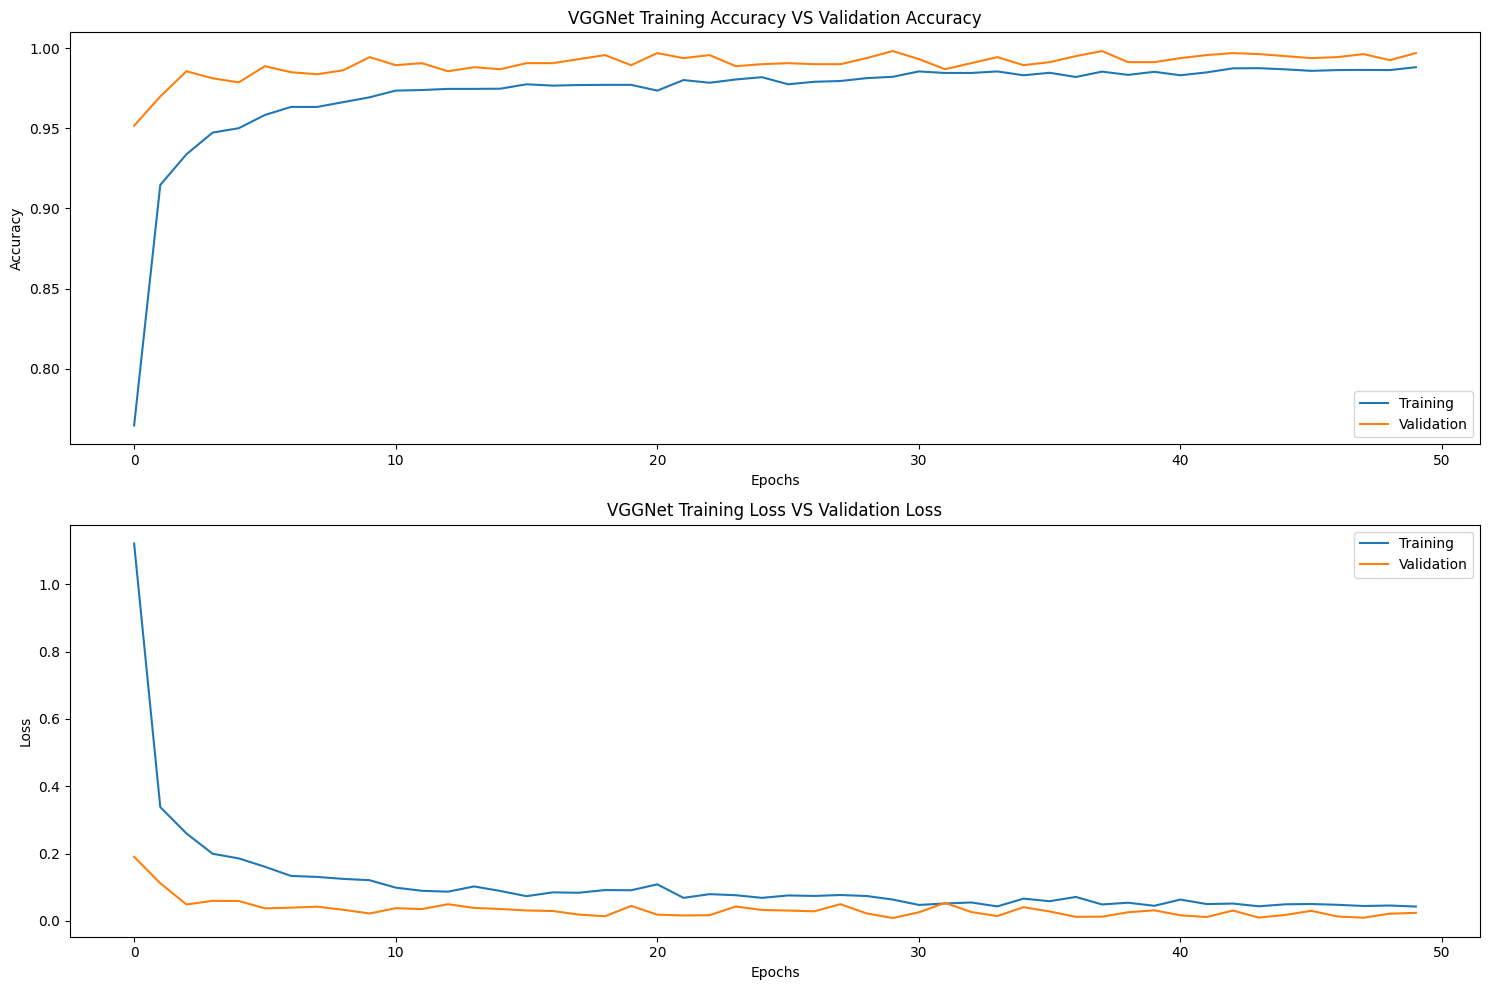

In [28]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# Plot Training Accuracy and Validation Accuracy
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('VGGNet Training Accuracy VS Validation Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend(['Training', 'Validation'])

# Plot Training Loss and Validation Loss
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('VGGNet Training Loss VS Validation Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend(['Training', 'Validation'])

plt.tight_layout()
plt.show()


In [32]:
# Load the model from the checkpoint path
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Saved_Model/VGGnet/50epoch.30-0.01.h5')

# Save the selected model with a different name
new_model.save('Saved_Model/VGGNet.h5')

In [36]:
# validate accuracy of VGGNet model
test_loss, test_acc = new_model.evaluate(valid_generator, verbose = 2)
print('\nVal_accuracy: ', test_acc)
print('\nVal_loss: ', test_loss)

1590/1590 - 25s - loss: 0.0220 - accuracy: 0.9937 - 25s/epoch - 16ms/step

Val_accuracy:  0.9937106966972351

Val_loss:  0.02204703725874424


1/1 [==============================] - 0s 20ms/step


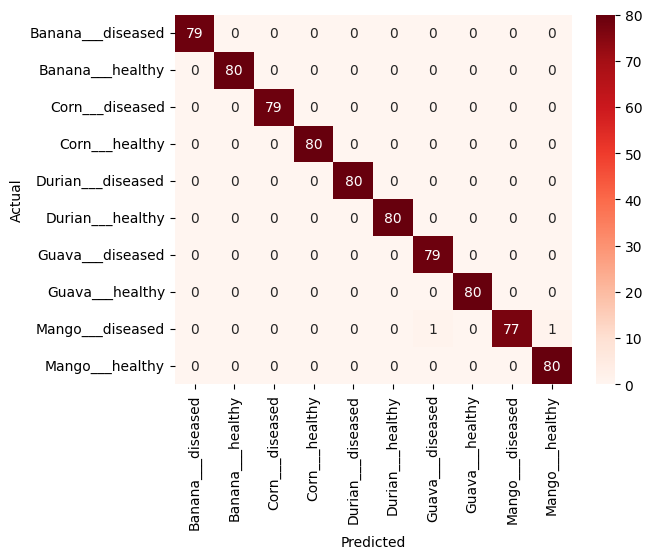

Test accuracy: 99.75%


In [38]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/MyDrive/Saved_Model/Saved_Model/VGGNet.h5')

filenames = test_generator.filenames
nb_samples = len(test_generator)

y_prob = []
y_act = []

test_generator.reset()
for _ in range(nb_samples):
    X_test, Y_test = test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class, actual_class]).T, columns=['predicted_class', 'actual_class'])

confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, cmap='Reds', annot=True, fmt='d')
plt.show()

accuracy = np.diagonal(confusion_matrix).sum() / confusion_matrix.sum().sum() * 100
print('Test accuracy: {:.2f}%'.format(accuracy))
